# predicting health coverage in the US

This project will call data from the American Community Survey Public Use MicroSample(PUMS) API. The most recent survey publicly availble at this API is from 2019. (Note data from 2020 are available to download in csv files).

This project uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau.

1. American Community Survey (ACS) (census.gov).
https://www.census.gov/programs-surveys/acs/
2. American Community Survey Data via API (census.gov).
https://www.census.gov/programs-surveys/acs/data/data-via-api.html

The goal of this project is to predict whether an individual has health insurance (or not) based on demographic data in the PUMS. 

In [18]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [19]:
nsamples = 500
datadir  = os.path.join(os.getcwd(),"data")

new_df_fname = os.path.join(datadir,'allstates_subsample' + str(nsamples) + '_select_columns.pkl')
df = pd.read_pickle(new_df_fname)

verbdf_fname = os.path.join(datadir,'allstates_subsample' + str(nsamples) + '_select_columns_verbdf.pkl')
verbdf = pd.read_pickle(verbdf_fname)

pred_df_fname = os.path.join(datadir,'allstates_subsample' + str(nsamples) + '_select_columns_predictors_df.pkl')
predictors_df = pd.read_pickle(pred_df_fname)

In [20]:
fname = os.path.join(datadir,str(nsamples) + 'targets_oi.csv')
targ_oi  = pd.read_csv(fname)
targname = targ_oi['healthcodes'][1]

In [21]:
df.head()

,HHLANP,FBATHP,WGTP23,WGTP22,WGTP25,WGTP24,FWATP,WGTP21,WGTP20,WGTP27,...,FHINCP,COMPOTHX,FSINKP,FHFLP,FSMXSP,PLMPRP,ACCESS,FSMOCP,TEL,TEN
0,9500,0,225,61,246,81,0,310,291,297,...,1,2,0,0,0,9,3,1,1,3
1,9500,0,48,55,42,16,0,108,51,61,...,0,2,0,0,0,9,1,0,1,1
2,9500,1,91,132,93,160,1,104,176,188,...,0,2,0,0,0,9,1,0,1,3
3,9500,0,60,77,53,57,0,55,16,53,...,1,2,0,0,0,9,3,1,1,2
4,9500,0,25,94,123,34,0,188,120,41,...,0,2,0,0,0,9,1,0,1,3


one-hot encode all categorical variables

In [22]:
target_y = df[targname]
X = df.drop(targname,axis=1)

In [23]:
catdf = X.select_dtypes('category')
numdf = X.select_dtypes('int')

if (catdf.shape[1] + numdf.shape[1] + 1) != df.shape[1]:
    print('missing column/data type not covered above')
print('category columns: ' + str(catdf.shape[1]))
print('numerical columns: ' + str(numdf.shape[1]))

catdf_fname = os.path.join(datadir,'catdf.pkl')
catdf.to_pickle(catdf_fname)
numdf_fname = os.path.join(datadir,'numdf.pkl')
numdf.to_pickle(numdf_fname)

category columns: 108
numerical columns: 95


In [24]:
# get dummy vars for categorical variables
dummydf = pd.get_dummies(catdf)
print('category columns after one-hot encoding: ' + str(dummydf.shape[1]))

dumdf_fname = os.path.join(datadir,'numdf.pkl')
dummydf.to_pickle(dumdf_fname)

category columns after one-hot encoding: 559


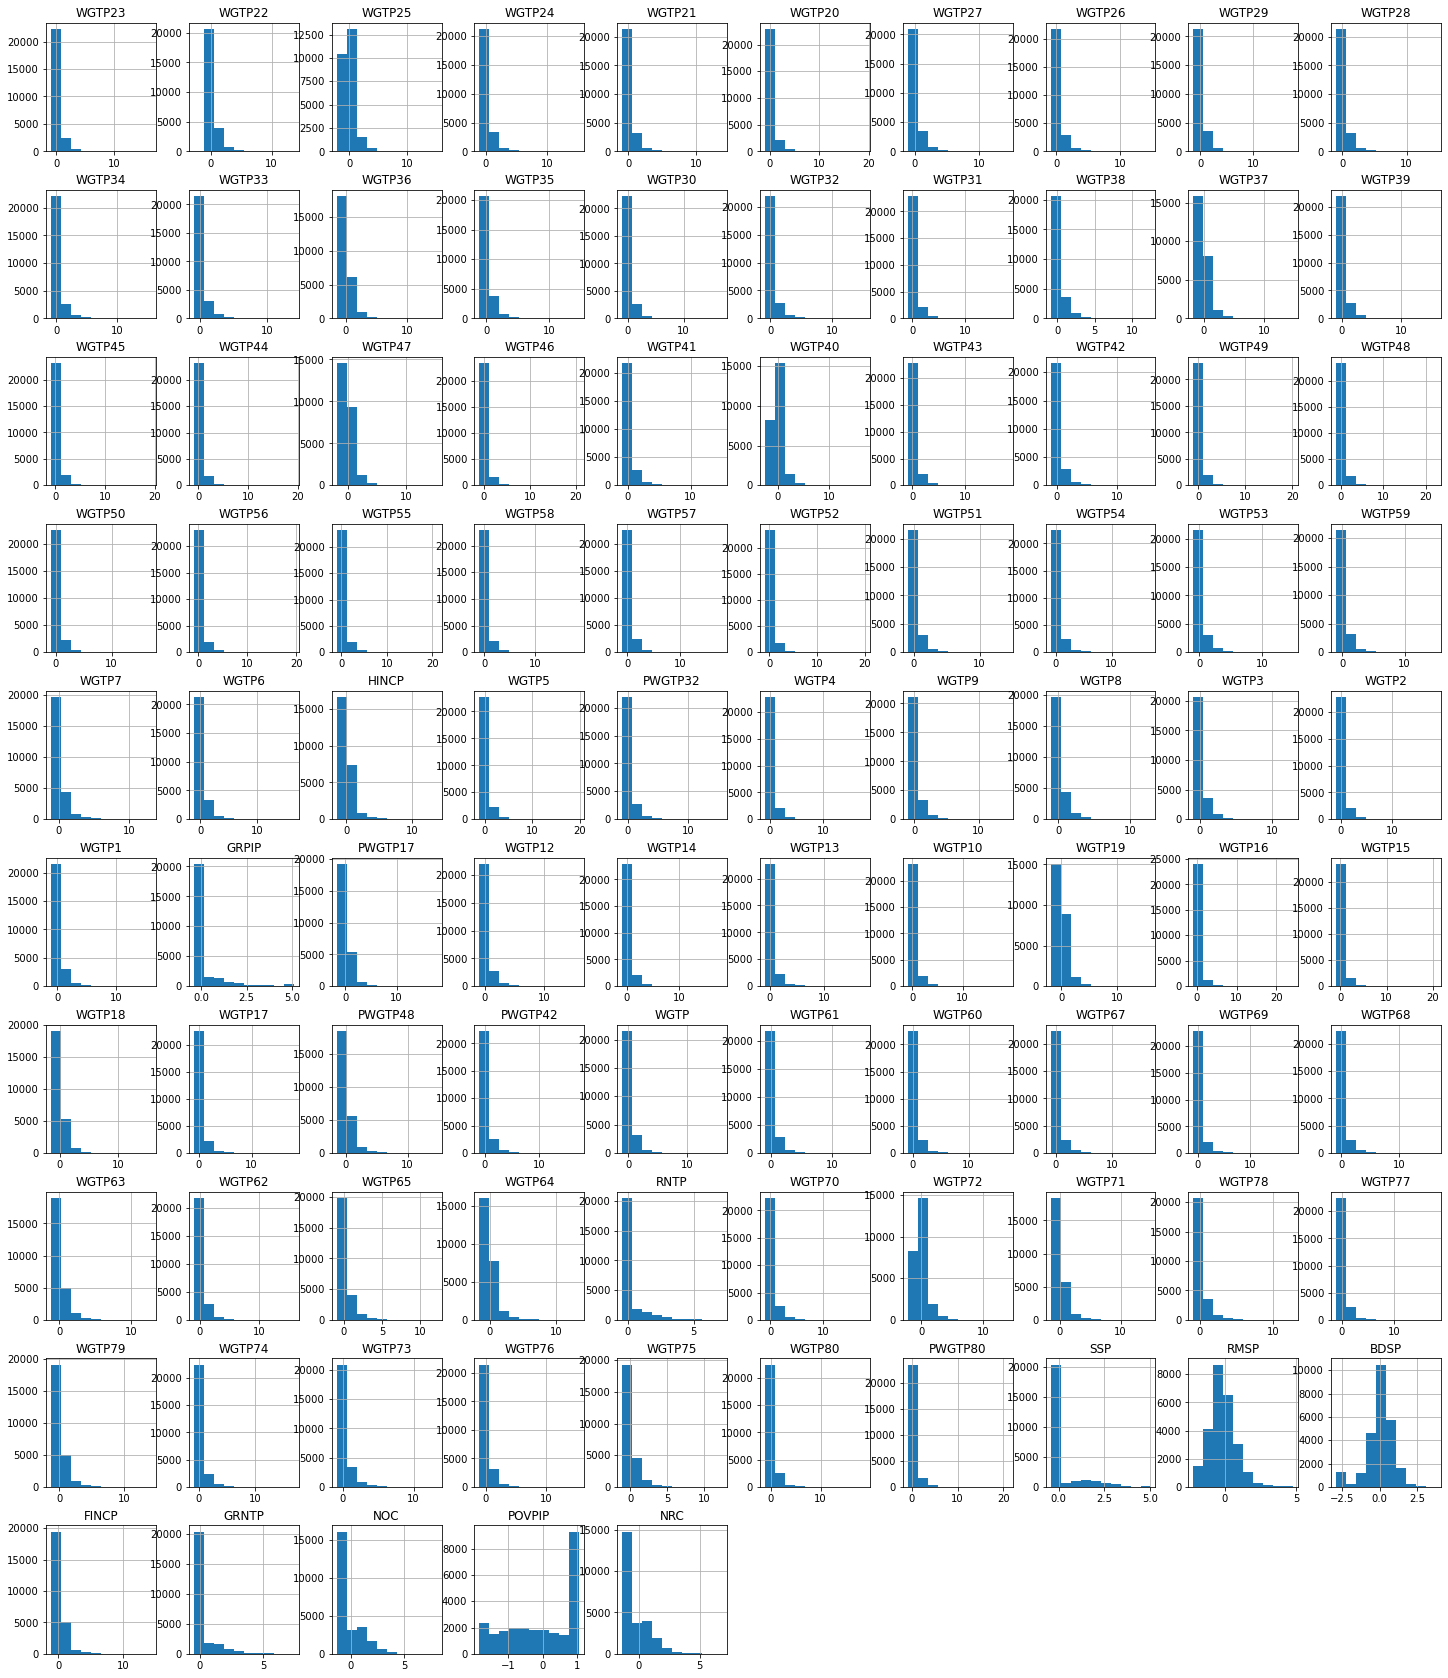

numerical columns: 95


In [25]:
# scale numerical data:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled = SS.fit_transform(numdf)
scaledf = pd.DataFrame(scaled, columns = numdf.columns)
scaledf.hist(figsize=(25,30))
plt.show()
print('numerical columns: ' + str(scaledf.shape[1]))

scaledf_fname = os.path.join(datadir,'numdf.pkl')
scaledf.to_pickle(scaledf_fname)

In [26]:
scale_dummydf = pd.concat([scaledf,dummydf],axis=1)
scale_dummydf.shape


scale_dummydf_fname = os.path.join(datadir,'scale_dummydf.pkl')
scale_dummydf.to_pickle(scale_dummydf_fname)

split data into training and test sets

In [27]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(scale_dummydf,target_y,test_size=0.25,random_state=123,stratify=target_y)

In [28]:
print(X_train.shape)
print(X_test.shape)

(19125, 654)
(6375, 654)


In [29]:
# check values in train and test data:
y_train_df = pd.DataFrame({'train':y_train})
y_test_df = pd.DataFrame({'test':y_test})

In [30]:
y_train_df.value_counts(normalize=True)

train
1        0.699399
0        0.300601
dtype: float64

In [31]:
y_test_df.value_counts(normalize=True)

test
1       0.699294
0       0.300706
dtype: float64

In [32]:
y_train_df.value_counts()

train
1        13376
0         5749
dtype: int64

In [33]:
y_test_df.value_counts()

test
1       4458
0       1917
dtype: int64

In [34]:
X_train.to_pickle('Xtrain_scale_dummydf.pkl')
y_train.to_pickle('ytrain_scale_dummydf.pkl')
X_test.to_pickle('Xtest_scale_dummydf.pkl')
y_test.to_pickle('ytest_scale_dummydf.pkl')